Preparação:

In [1]:
import numpy as np

# Importa o módulo de plotagem
import matplotlib.pyplot as plt

# Configura a matplotlib para operar interativamente no notebook.
# Para detalhes, execute: %matplotlib?
%matplotlib inline

# Configura o tamanho padrão da figura largura X altura, em polegadas
plt.rcParams['figure.figsize'] = (10, 8)

Cria 3 datasets de exemplo:

In [2]:
from sklearn.datasets import make_moons, make_circles, make_classification

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2, 
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)

datasets = [make_moons(noise=0.3, random_state=0), make_circles(noise=0.2, 
                                                                factor=0.5, random_state=1), (X, y)]

In [3]:
def plot_classification(name, clf, X, y, cmap=plt.cm.RdBu):
    '''Esta função recebe um classificador e um conjunto de dados
    na forma de um array X com dimensões M x 2 (M amostras com 2 
    características) e as M classes esperadas na forma de um 
    array y. Ela então exibe graficamente os dados e a fronteira
    de decisão aprendida pelo classificador (previamente treinado).
    '''
    score = clf.score(X, y)
    x_min, x_max = X[:, 0].min(), X[:, 0].max()
    y_min, y_max = X[:, 1].min(), X[:, 1].max()
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.2), np.arange(y_min, y_max, 0.2))    
    
    if hasattr(clf, "decision_function"):
        Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    else:
        Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]    
       
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=cmap, alpha=.8)
    if hasattr(clf, "decision_function"):
        plt.contour(xx, yy, Z, [0.0], colors='k', linestyles=['solid'])
    else:
        plt.contour(xx, yy, Z, [0.5], colors='k', linestyles=['solid'])

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(name + " - Score %.2f" % score)

# Classificação

## Problema

Considere os seguintes dados, classificados em **duas classes**, exibidas em azul e vermelho:

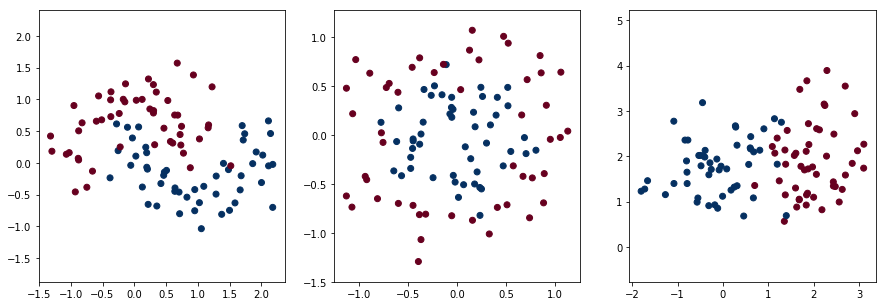

In [4]:
fig = plt.figure(figsize=(15, 5))
for i, (X, y) in enumerate(datasets):
    plt.subplot(1,3,i+1)    
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdBu)
    plt.axis('equal')

Gostaríamos de criar um **classificador** capaz de apropriadamente **separar** duas classes e corretamente classificar novas entradas.

## Os $K$ vizinhos mais próximos

O *K vizinhos mais próximos* é um classificador simples mas comumente utilizado. Ele armazena o conjunto de treinamento como um conjunto de *exemplos*. Quando desejamos classificar uma nova amostra (ponto) $x$, o classificador simplesmente busca os $K$ pontos $x_i$ mais próximos de $x$ no conjunto de treinamento e faz uma votação: a classe atribuída a $x$ é a classe mais observada entre os K vizinhos. 

In [5]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

In [6]:
X, y = datasets[0]
knn.fit(X, y) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

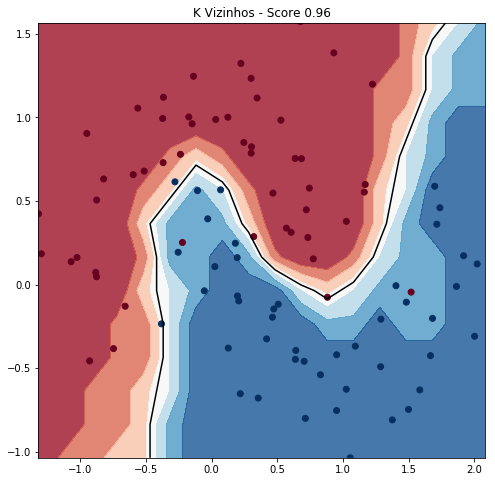

In [7]:
fig = plt.figure(figsize=(8, 8))
plot_classification('K Vizinhos', knn, X, y, plt.cm.RdBu)

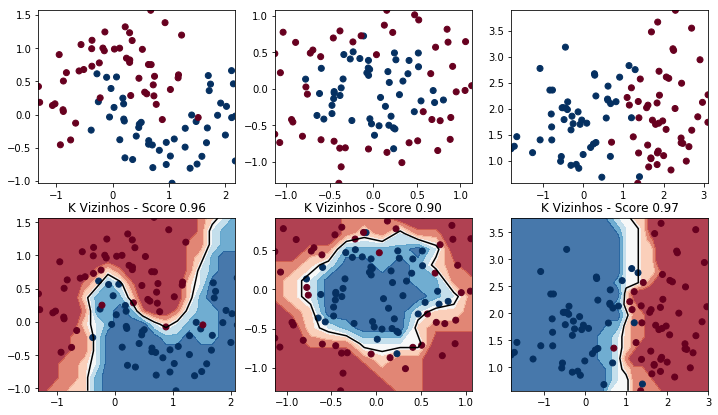

In [8]:
fig = plt.figure(figsize=(12, 7))
for i, (X, y) in enumerate(datasets):
    plt.subplot(2, 3, i+1)    
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdBu)
    plt.xlim(X[:, 0].min(), X[:, 0].max())
    plt.ylim(X[:, 1].min(), X[:, 1].max())
for dataset_idx, (X, y) in enumerate(datasets):
    plt.subplot(2, 3, 3+dataset_idx+1)
    knn.fit(X, y) 
    plot_classification('K Vizinhos', knn, X, y, plt.cm.RdBu)

## Máquinas de suporte vetorial (SVM)

Duas perguntas surgem quando utilizamos $K$ vizinhos:

1. Todas as amostras são mesmo necessárias para definir a superfície de decisão?
2. Qual a melhor forma de obter uma boa superfície de decisão?

![Maximização da margem](./figs/svm-margin.png)

Figura retirada do (excelente!) *The Elements of Statistical Learning*, escrito por Trevor Hastie, Robert Tibshirani e 
Jerome Friedman (capítulo 12, página 418). O livro foi [disponibilizado on-line pelos autores](https://web.stanford.edu/~hastie/ElemStatLearn), em PDF.

Máquinas de vetores de suporte encontram o **hiperplano**, capaz de separar as amostras das duas classes, que apresenta a **maior margem de segurança** (acima, com largura $2M$). Quando as classes não são perfeitamente separáveis pelo hiperplano, alguns pontos $\xi_j$ podem estar no lado errado da margem por um montante de $\xi_j^* = M \xi_j$ (pontos no lado correto apresentam $\xi_j^* = 0$). A margem é maximizada respeitando-se um "orçamento" de $\sum \xi_i \leq $ constante. 

O problema de otimização em questão é comumente com técnicas de [*quadratic programming*](https://en.wikipedia.org/wiki/Quadratic_programming). Felizmente, a scikit-learn realiza este trabalho para nós.

In [9]:
from sklearn.svm import SVC

svc = SVC(kernel='linear')
X, y = datasets[2]
svc.fit(X, y) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

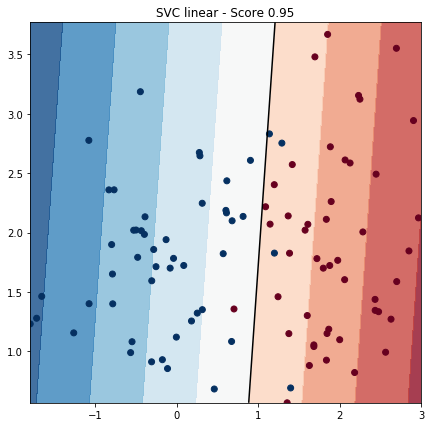

In [10]:
fig = plt.figure(figsize=(7, 7))
plot_classification('SVC linear', svc, X, y, plt.cm.RdBu)

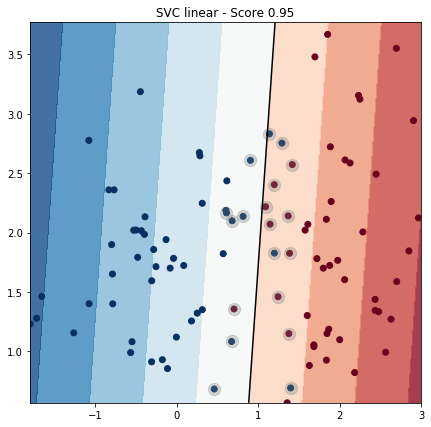

In [11]:
fig = plt.figure(figsize=(7, 7))
plot_classification('SVC linear', svc, X, y, plt.cm.RdBu)
plt.scatter(svc.support_vectors_[:,0], svc.support_vectors_[:,1], s=150, marker='o', color='gray', alpha=0.3)

In [12]:
print X.shape
print svc.support_vectors_.shape

(100, 2)
(19, 2)


Apenas 19 pontos foram necessários - esses são os **vetores de suporte** e correspondem aos pontos $\xi_j$

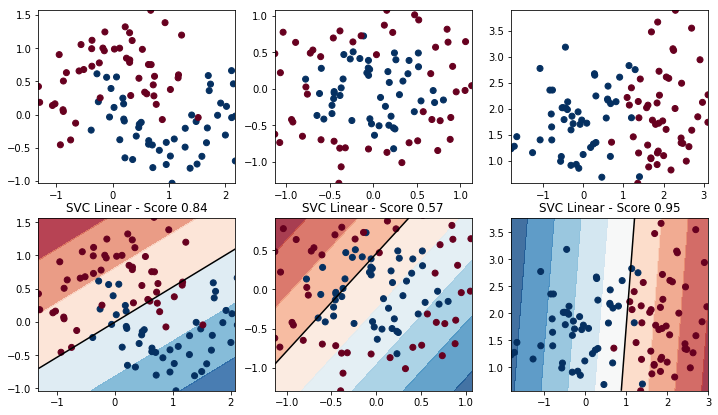

In [13]:
fig = plt.figure(figsize=(12, 7))

for i, (X, y) in enumerate(datasets):
    plt.subplot(2, 3, i+1)    
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdBu)
    plt.xlim(X[:, 0].min(), X[:, 0].max())
    plt.ylim(X[:, 1].min(), X[:, 1].max())

for dataset_idx, (X, y) in enumerate(datasets):
    plt.subplot(2, 3, 3+dataset_idx+1)
    svc.fit(X, y) 
    plot_classification('SVC Linear', svc, X, y, plt.cm.RdBu)

## Problema: classes mal separadas por hiperplanos

Solução: transformar o espaço original para uma espaço com *mais dimensões* em que as classes são separáveis por um hiperplano (veja [este vídeo](https://www.youtube.com/watch?v=3liCbRZPrZA) para um exemplo).

Na prática, não precisamos encontrar um novo espaço explicitamente. Um tipo especial de função $h$, chamada *kernel*, pode ser utilizada para transformar as amostras $x_i$. Uma SVM, treinada para achar um hiperplano para os dados transformados $h(x_i)$, encontra uma fronteira não-(hiper)plana no espaço original dos pontos $x_i$. Este procedimento é comumente chamado de [*the kernel trick*](http://www.eric-kim.net/eric-kim-net/posts/1/kernel_trick.html).

In [14]:
svc = SVC(kernel='poly', degree=3)
svc

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

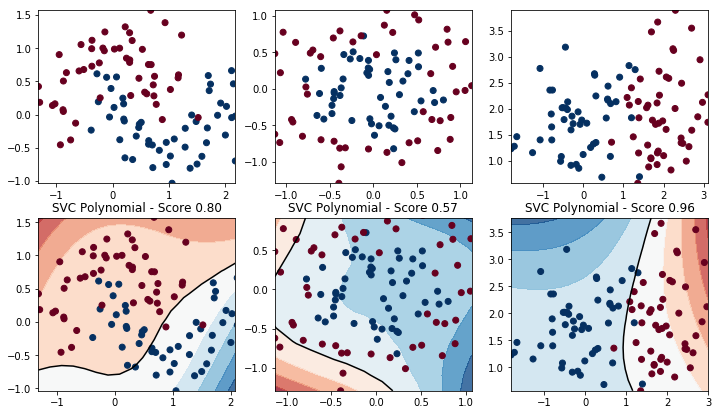

In [15]:
fig = plt.figure(figsize=(12, 7))
for i, (X, y) in enumerate(datasets):
    plt.subplot(2, 3, i+1)    
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdBu)
    plt.xlim(X[:, 0].min(), X[:, 0].max())
    plt.ylim(X[:, 1].min(), X[:, 1].max())
for dataset_idx, (X, y) in enumerate(datasets):
    plt.subplot(2, 3, 3+dataset_idx+1)
    svc.fit(X, y) 
    plot_classification('SVC Polynomial', svc, X, y, plt.cm.RdBu)

In [16]:
svc = SVC(kernel='rbf')

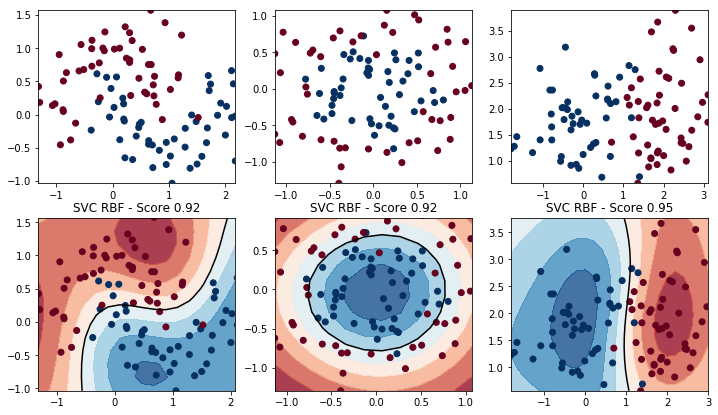

In [17]:
fig = plt.figure(figsize=(12, 7))
for i, (X, y) in enumerate(datasets):
    plt.subplot(2, 3, i+1)    
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdBu)
    plt.xlim(X[:, 0].min(), X[:, 0].max())
    plt.ylim(X[:, 1].min(), X[:, 1].max())
for dataset_idx, (X, y) in enumerate(datasets):
    plt.subplot(2, 3, 3+dataset_idx+1)
    svc.fit(X, y) 
    plot_classification('SVC RBF', svc, X, y, plt.cm.RdBu)

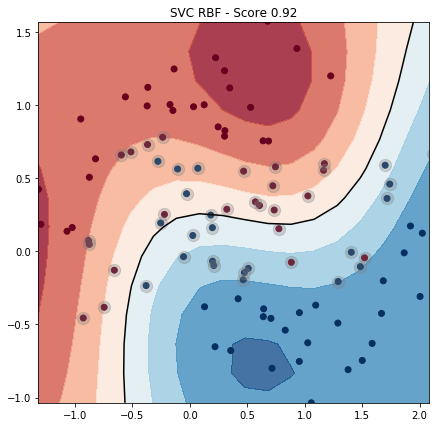

In [18]:
fig = plt.figure(figsize=(7, 7))
X, y = datasets[0]
svc.fit(X, y)
plot_classification('SVC RBF', svc, X, y)
plt.scatter(svc.support_vectors_[:,0], svc.support_vectors_[:,1], s=150, marker='o', color='gray', alpha=0.3)

## Exercício - *Iris*

In [19]:
from sklearn.datasets import load_iris
iris = load_iris()

In [20]:
print iris.DESCR

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [21]:
X = iris.data[:,2:]
y = iris.target

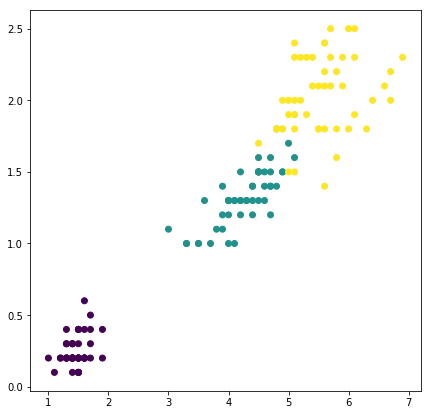

In [22]:
fig = plt.figure(figsize=(7, 7))
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.viridis)

Crie um classificador capaz de separar as 3 classes de plantas.

### Solução

In [23]:
svc = SVC(kernel='rbf')
svc.fit(X, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [24]:
def plot_multi_class(name, clf, X, y, cmap=plt.cm.viridis):
    score = clf.score(X, y)

    h = 0.2
    x_min, x_max = X[:, 0].min(), X[:, 0].max()
    y_min, y_max = X[:, 1].min(), X[:, 1].max()
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))    
   
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.pcolormesh(xx, yy, Z, cmap=cmap, shading='gouraud', alpha=0.4, edgecolors='None')
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())    
    plt.title(name + " - Score %.2f" % score)

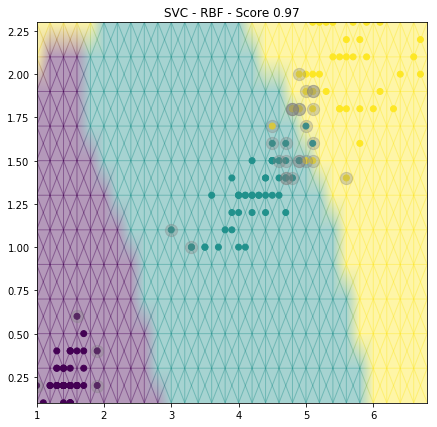

In [25]:
fig = plt.figure(figsize=(7, 7))
plot_multi_class('SVC - RBF', svc, X, y)
plt.scatter(svc.support_vectors_[:,0], svc.support_vectors_[:,1], s=150, marker='o', color='gray', alpha=0.3)